In [1]:
import pandas as pd


In [2]:
houses = pd.read_csv('../data/cleaned_train_data.csv',keep_default_na=False)
houses.describe()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,0.171575,0.043080,0.995890,0.999315,0.566591,0.571918,0.719332,0.581096,0.064448,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,0.081698,0.046653,0.063996,0.026171,0.153666,0.139100,0.218862,0.344090,0.112957,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.133562,0.029229,1.000000,1.000000,0.444444,0.500000,0.594203,0.283333,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,0.167808,0.038227,1.000000,1.000000,0.555556,0.500000,0.731884,0.733333,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,0.208904,0.048150,1.000000,1.000000,0.666667,0.625000,0.927536,0.900000,0.102656,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# corr_matrix = houses.corr()['YearBuilt']
import numpy as np 

corr_mat = houses.corr(method='pearson') 
  
# Convert correlation matrix to 1-D Series and sort 
sorted_mat = corr_mat.unstack().sort_values() 

for x in range(0, len(sorted_mat)):
    value = sorted_mat[x]    
    if value > .8 or value < -.8:
        print(sorted_mat[[x]])
        


MiscFeature_None  MiscFeature_Shed   -0.95089
dtype: float64
MiscFeature_Shed  MiscFeature_None   -0.95089
dtype: float64
GarageType_None  GarageCond   -0.946245
dtype: float64
GarageCond  GarageType_None   -0.946245
dtype: float64
GarageQual  GarageType_None   -0.942499
dtype: float64
GarageType_None  GarageQual   -0.942499
dtype: float64
RoofStyle_Gable  RoofStyle_Hip   -0.933462
dtype: float64
RoofStyle_Hip  RoofStyle_Gable   -0.933462
dtype: float64
MSZoning_RL  MSZoning_RM   -0.808585
dtype: float64
MSZoning_RM  MSZoning_RL   -0.808585
dtype: float64
MasVnrType_None  MasVnrType_BrkFace   -0.806337
dtype: float64
MasVnrType_BrkFace  MasVnrType_None   -0.806337
dtype: float64
BsmtFinSF2  BsmtFinType2    0.801503
dtype: float64
BsmtFinType2  BsmtFinSF2    0.801503
dtype: float64
HouseStyle_2Story  2ndFlrSF    0.80915
dtype: float64
2ndFlrSF  HouseStyle_2Story    0.80915
dtype: float64
TotalBsmtSF  1stFlrSF    0.81953
dtype: float64
1stFlrSF  TotalBsmtSF    0.81953
dtype: float64
TotR

Looking at the output above, the following columns have a high correlation value:
- MiscFeature_None and MiscFeature_Shed
- GarageCond and GarageType_None
- GarageQual and GarageType_None
- RoofStyle_Hip and RoofStyle_Gable
- BsmtCond and BsmtFinType1_None
- BsmtFinType1_None and BsmtCond
- BsmtCond and BsmtFinType2_None
- MSZoning_RL and MSZoning_RM
- MasVnrType_BrkFace and MasVnrType_None
- BsmtFinType1_None and Foundation_Slab
- HouseStyle_2Story and 2ndFlrSF 
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd
- GarageYrBlt and YearBuilt
- Exterior2nd_Wd Sdng and Exterior1st_Wd Sdng 
- Neighborhood_Somerst and MSZoning_FV
- Fireplaces and FireplaceQu
- GarageArea and GarageCars 
- Exterior1st_HdBoard and Exterior2nd_HdBoard
- PoolArea and PoolQC
- GarageCond and GarageQual
- LotConfig_Inside and LotConfig_labels
- Exterior2nd_MetalSd and Exterior1st_MetalSd
- Exterior1st_CemntBd and Exterior2nd_CmentBd
- Exterior1st_VinylSd and Exterior2nd_VinylSd
- BsmtFinType1_None and BsmtFinType2_None
- SaleType_New and SaleCondition_Partial

### Here we calculate correlations between all variables (without dummies)

We use dython.associations to find the correlations and then we find all the features with correlation
above .8 in absolute value but not equal to 1. We might be able to either combine these features or drop one of them. 

In [4]:
houses_filled_in = pd.read_csv('../data/filled_in_data.csv', keep_default_na=False)
houses_filled_in.drop(columns=houses_filled_in.columns[0], axis=1, inplace=True)
houses_filled_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

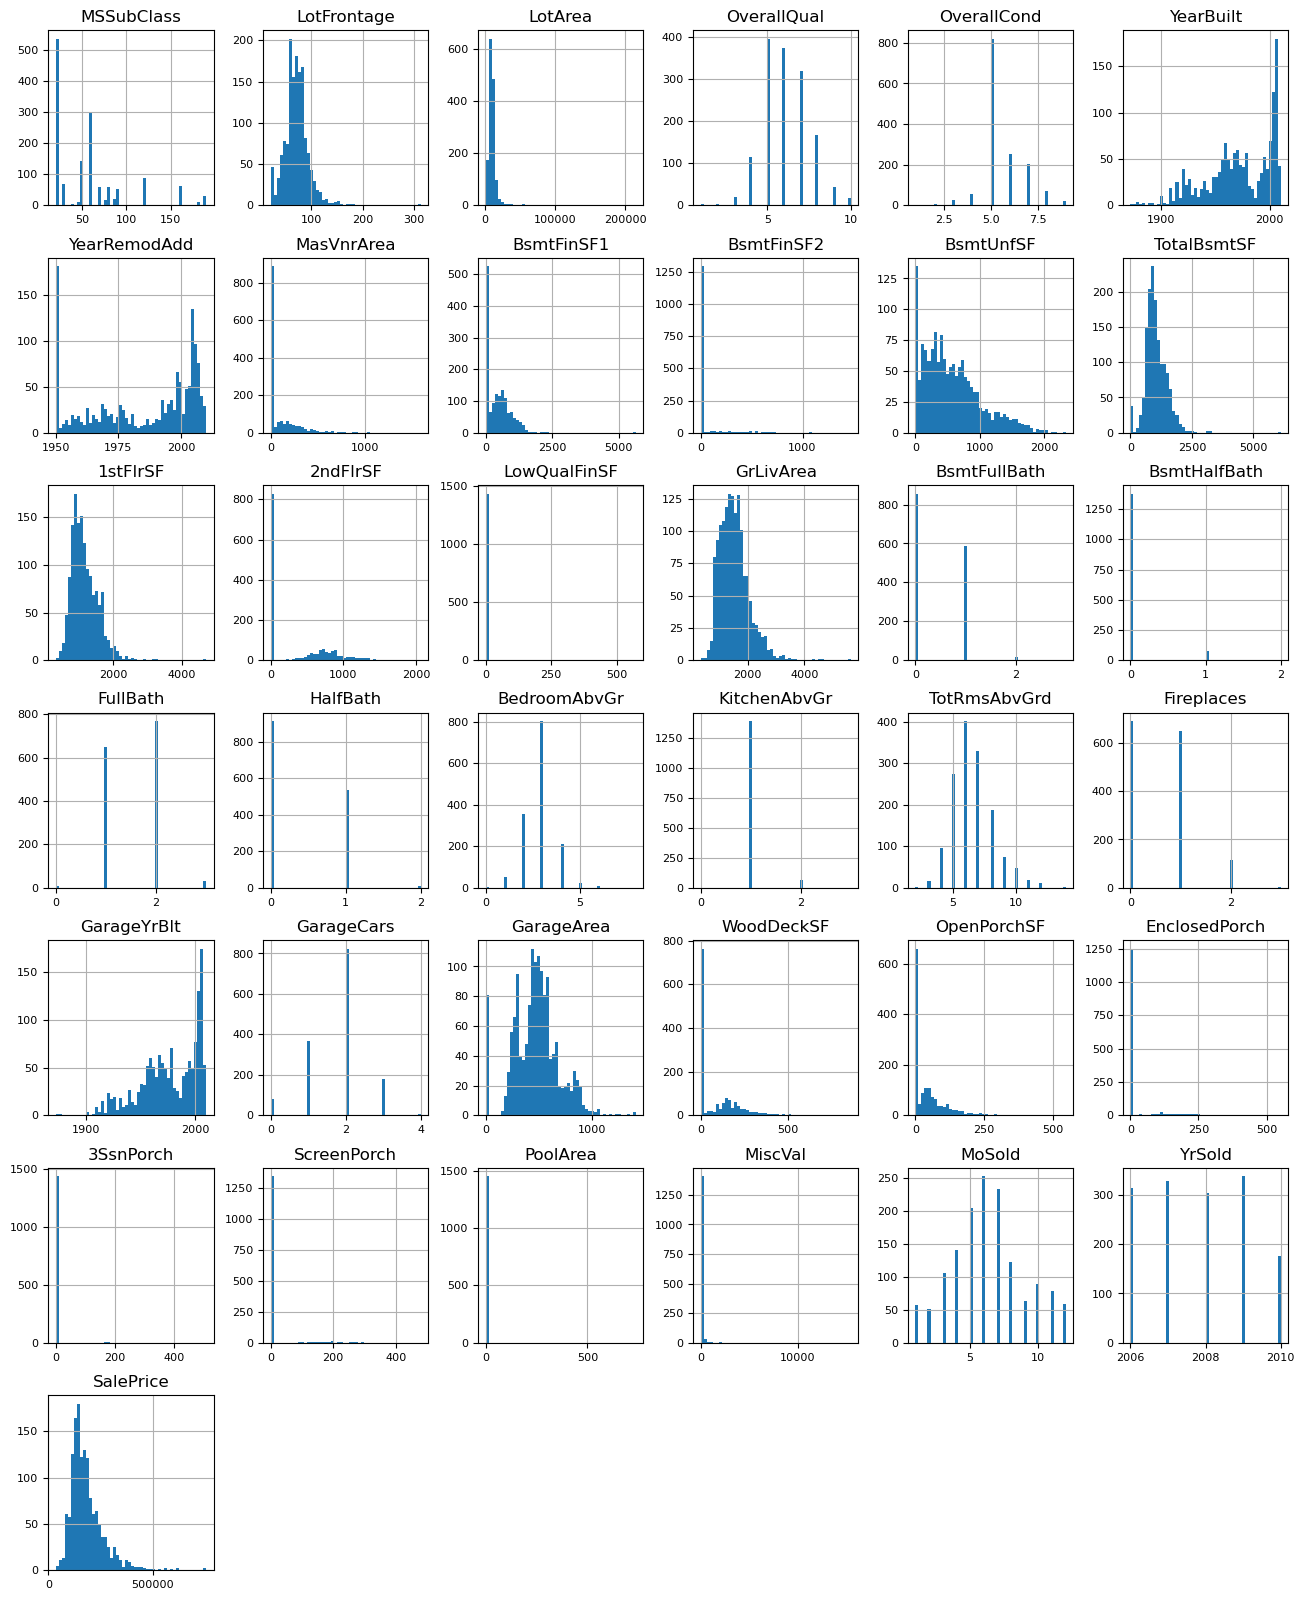

In [5]:
numeric_cols = houses_filled_in.select_dtypes(include=['int64', 'float64'])
numeric_cols.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [6]:
plt.figure(figsize=(18,16))
sns.heatmap(numeric_cols.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap for numerical features')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns


categorical_features=identify_nominal_columns(houses_filled_in)

complete_correlation= associations(houses_filled_in, nominal_columns=categorical_features, figsize=(10,10), nan_strategy='drop_features', compute_only=True)

In [ ]:
complete_corr = complete_correlation['corr']


In [ ]:
complete_corr.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotConfig_labels
count,81.0,81.0,81.00000,81.000000,81.0,81.0,81.0,81.0,81.0,81.0,...,81.0,81.0,81.0,81.000000,81.000000,81.000000,81.0,81.0,81.000000,81.0
unique,81.0,77.0,81.00000,81.000000,59.0,73.0,76.0,73.0,48.0,70.0,...,61.0,68.0,66.0,81.000000,81.000000,81.000000,73.0,78.0,81.000000,80.0
top,1.0,0.0,-0.37916,-0.139781,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.007683,-0.013585,-0.021407,0.0,0.0,-0.084284,1.0
freq,1.0,5.0,1.00000,1.000000,23.0,9.0,6.0,9.0,33.0,11.0,...,21.0,14.0,16.0,1.000000,1.000000,1.000000,9.0,4.0,1.000000,2.0


In [ ]:
for col in complete_corr:
    complete_corr[col] = complete_corr[col].astype('float')



In [ ]:
complete_corr['SalePrice'].sort_values()

KitchenAbvGr       -0.135907
EnclosedPorch      -0.128578
MSSubClass         -0.084284
OverallCond        -0.077856
LotConfig_labels   -0.067396
                      ...   
ExterQual           0.690933
GrLivArea           0.708624
Neighborhood        0.738630
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, Length: 81, dtype: float64

In [ ]:
complete_corr['GarageArea'].sort_values()

OverallCond     -0.151521
EnclosedPorch   -0.121777
MSSubClass      -0.098672
LowQualFinSF    -0.067601
KitchenAbvGr    -0.064433
                   ...   
GarageYrBlt      0.602803
SalePrice        0.623431
GarageFinish     0.625602
GarageCars       0.882475
GarageArea       1.000000
Name: GarageArea, Length: 81, dtype: float64

In [ ]:
sorted_mat = complete_corr.unstack().sort_values() 

for x in range(0, len(sorted_mat)):
    value = sorted_mat[x]    
    if value > .8 or value < -.8:
        if value != 1:
            print(sorted_mat[[x]])

1stFlrSF  TotalBsmtSF    0.81953
dtype: float64
TotalBsmtSF  1stFlrSF    0.81953
dtype: float64
TotRmsAbvGrd  GrLivArea    0.825489
dtype: float64
GrLivArea  TotRmsAbvGrd    0.825489
dtype: float64
BsmtFinSF2  BsmtFinType2    0.838641
dtype: float64
BsmtFinType2  BsmtFinSF2    0.838641
dtype: float64
GarageYrBlt  YearBuilt    0.845141
dtype: float64
YearBuilt  GarageYrBlt    0.845141
dtype: float64
BldgType  MSSubClass    0.863889
dtype: float64
MSSubClass  BldgType    0.863889
dtype: float64
GarageCars  GarageArea    0.882475
dtype: float64
GarageArea  GarageCars    0.882475
dtype: float64
Neighborhood  YearBuilt    0.883812
dtype: float64
YearBuilt  Neighborhood    0.883812
dtype: float64
Fireplaces  FireplaceQu    0.901204
dtype: float64
FireplaceQu  Fireplaces    0.901204
dtype: float64
2ndFlrSF  HouseStyle    0.916506
dtype: float64
HouseStyle  2ndFlrSF    0.916506
dtype: float64
MiscVal  MiscFeature    0.935741
dtype: float64
MiscFeature  MiscVal    0.935741
dtype: float64
PoolQC

List of features to (possibly) combine/drop:

Looking at the neighborhoood dummy variables, there are 18 total categories. Since there are so many categories, it would be hard to find a pattern so we decided to drop these variables altogether.

Looking at the Exterior1 and Exterior2 dummy variables, there are 17 total categories. Since there are so many categories, it would be hard to generalize a pattern so we decided to drop these variables.

Pool Area and Pool QC: Perhaps we can drop Pool QC and just use Pool Area so that its actually a numerical value

MiscFeature and MiscVal: We can drop MiscFeature and just use MiscVal since the specific feature doesn't necessarily matter, what matters is the added value

GarageArea and GarageCars: We will choose GarageArea over GarageCars since we can assume that the area tells whether one car can fit or not, and in addition, it will tell us if it bigger than a standard garage area

GrLivArea and TotRmsAbvGrd: We can drop TotRmsAbvGrd since GrLivArea includes TotRmsAbvGrd

GarageCond and GarageQual: Since these are the basically the same variable, we can drop one of them

Additionally to the correlations observed above I think we can also combine some features in the following ways (Do you guys think this makes sense?):

Overall_rating = OverallQual + OverallCond

YearBuilt & GarageYrBuilt & YearRemodAdd -> Something?? There are approx 200 cases in which the garage was built in neither of those two years.

MasVnrValue = MasVnrArea * MasVnrType where MasVnrType has an order of None < Common < Face < Stone (where do we put cinder block? might have to check test_data)

Exter_rating = ExterQual + ExterCond

Bsmt_rating = BsmtQual + BsmtCond

BsmtFinType1_rating = BsmtFinType1 * BsmtFinSF1 where BsmtFinSF1 has an order of None < Unf < LwQ < BLQ < Rec < ALQ < GLQ

BsmtFinType2_rating = BsmtFinType2 * BsmtFinSF2 same order as above

Bsmt_total_SF_rating = BsmtFinType1_rating + BsmtFinType2_rating + BsmtUnfSF * (coeff of Unf)

(Now TotalBsmtSF is redundant)

Total_goodqual_aboveground_area = 1stFlrSF + 2ndFlrSF - LowQualFinSF #Would we drop 1stFlrSF, 2ndFlrSF, and LowQualFinSF then? Do we think that those individual variables could help with predicting?

Basement_bathrooms = BsmtFullBath + (.5) * BsmtHalfBath

Aboveground_bathrooms = FullBath + (.5) * HalfBath

Kitchen_rating = Kitchen * KitchenQual where KitchenQual has the obvious order

Fireplace_rating = Fireplace * FireplaceQu where FireplaceQu has the obvious order

** To be continued **

In [ ]:
houses = houses.drop(['PoolQC', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'GarageCars', 'TotRmsAbvGrd', 'GarageQual'], axis=1)


In [ ]:
cols_to_drop = houses.columns[houses.columns.str.contains('Neighborhood')]
houses.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = houses.columns[houses.columns.str.contains('Exterior1')]
houses.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = houses.columns[houses.columns.str.contains('Exterior2')]
houses.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
houses['Overall_Rating'] = houses['OverallCond'] + houses['OverallQual']
houses['Exter_Rating'] = houses['ExterQual'] + houses['ExterCond']
houses['Bsmt_rating'] = houses['BsmtQual'] + houses['BsmtCond']

# houses['Total_goodqual_aboveground_area'] = houses['1stFlrSF'] + houses['2ndFlrSF'] - houses['LowQualFinSF'] 

houses['Basement_bathrooms'] = houses['BsmtFullBath'] + ((.5) * houses['BsmtHalfBath'])
houses['Aboveground_bathrooms'] = houses['FullBath'] + ((.5) * houses['HalfBath'])
houses['Kitchen_Rating'] = houses['KitchenAbvGr'] * houses['KitchenQual']
houses['Fireplace_Rating'] = houses['Fireplaces'] * houses['FireplaceQu']
houses['Condition1'] = houses['Condition1_Feedr'] + houses['Condition1_Norm'] + houses['Condition1_PosA'] + houses['Condition1_PosN'] + houses['Condition1_RRAe'] + houses['Condition1_RRAn'] + houses['Condition1_RRNe'] + houses['Condition1_RRNn']
houses['Condition2'] = houses['Condition1_Feedr'] + houses['Condition1_Norm'] + houses['Condition1_PosA'] + houses['Condition1_PosN'] + houses['Condition1_RRAe'] + houses['Condition1_RRAn'] + houses['Condition1_RRNe'] + houses['Condition1_RRNn']
houses['Total_Condtion'] = houses['Condition1'] + houses['Condition2']
houses['BsmtFinType1_rating'] = houses['BsmtFinType1'] * houses['BsmtFinSF1'] 
houses['BsmtFinType2_rating'] = houses['BsmtFinType2'] * houses['BsmtFinSF2']
houses['Bsmt_total_SF_rating'] = houses['BsmtFinType1_rating'] + houses['BsmtFinType2_rating']

In [ ]:
cols_to_drop = houses.columns[houses.columns.str.contains('Condition1')]
houses.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = houses.columns[houses.columns.str.contains('Condition2')]
houses.drop(cols_to_drop, axis=1, inplace=True)
houses = houses.drop(['OverallCond', 'OverallQual', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2' ],  axis=1)


In [ ]:
pd.set_option('display.max_columns', None)

houses.describe()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,Functional,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Overall_Rating,Exter_Rating,Bsmt_rating,Basement_bathrooms,Aboveground_bathrooms,Kitchen_Rating,Fireplace_Rating,Total_Condtion,BsmtFinType1_rating,BsmtFinType2_rating,Bsmt_total_SF_rating
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,0.171575,0.043080,0.995890,0.999315,0.719332,0.581096,0.064448,0.407534,0.242826,0.173065,0.007808,0.786301,0.934932,0.972432,0.190139,0.168035,0.010218,0.222582,0.358305,0.973630,0.757301,0.571918,0.333554,0.561781,0.928082,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,2007.815753,180921.195890,0.044521,0.010959,0.788356,0.149315,0.937671,0.028082,0.028082,0.006849,0.633562,0.034247,0.024658,0.897945,0.064384,0.032192,0.002740,0.720548,0.044521,0.008904,0.021233,0.035616,0.029452,0.078082,0.009589,0.497260,0.005479,0.007534,0.304795,0.025342,0.044521,0.781507,0.007534,0.195890,0.004795,0.001370,0.982192,0

In [ ]:
houses.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,Functional,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Overall_Rating,Exter_Rating,Bsmt_rating,Basement_bathrooms,Aboveground_bathrooms,Kitchen_Rating,Fireplace_Rating,Total_Condtion,BsmtFinType1_rating,BsmtFinType2_rating,Bsmt_total_SF_rating
0,60,0.150685,0.033420,1.0,1.0,0.949275,0.883333,0.12250,0.25,0.064212,0.140098,0.0,1.00,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.375,1.0,0.949275,0.666667,0.386460,0.6,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,2008,208500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.166667,1.166667,1.55,0.333333,0.916667,0.222222,0.000000,2.0,0.125089,0.0,0.125089
1,20,0.202055,0.038795,1.0,1.0,0.753623,0.433333,0.00000,1.00,0.121575,0.206547,0.0,1.00,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.375,1.0,0.753623,0.666667,0.324401,0.6,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,2007,181500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.430556,0.833333,1.55,0.250000,0.666667,0.111111,0.200000,2.0,0.144401,0.0,0.144401
2,60,0.160959,0.046507,1.0,1.0,0.934783,0.866667,0.10125,0.50,0.185788,0.150573,0.0,1.00,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.375,1.0,0.934783,0.666667,0.428773,0.6,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,2008,223500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.166667,1.166667,1.55,0.333333,0.916667,0.222222,0.200000,2.0,0.086109,0.0,0.086109
3,70,0.133562,0.038561,1.0,1.0,0.311594,0.333333,0.00000,0.25,0.231164,0.123732,0.0,0.75,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.375,1.0,0.913043,0.333333,0.452750,0.6,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,2006,140000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [ ]:
houses.to_csv('../data/processed_data.csv',index=False)

NameError: name 'houses' is not defined

In [ ]:
tsHouses = pd.read_csv('../data/filled_in_data.csv', keep_default_na=False)


## Time Series Analysis Plots

<Axes: title={'center': 'Sale Price vs Month Sold'}, xlabel='YrSold'>

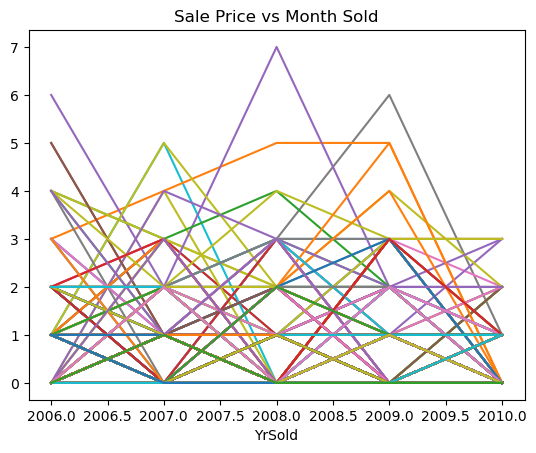

In [ ]:
pd.crosstab(tsHouses['MoSold'], tsHouses['SalePrice']).plot(kind='line', title = 'Sale Price vs Month Sold', legend=False)


<Axes: title={'center': 'Sale Price vs Year Sold'}, xlabel='YrSold'>

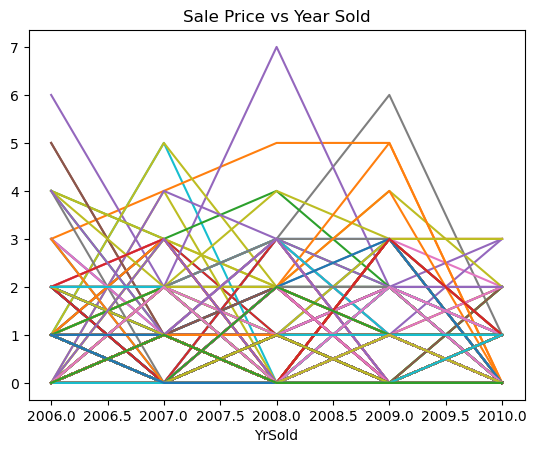

In [ ]:
pd.crosstab(tsHouses['YrSold'], tsHouses['SalePrice']).plot(kind='line', title = 'Sale Price vs Year Sold', legend=False)


## Features vs Sale Price
- Visualizing independent variables vs the dependent variable can help us gauge which features may be important in the model

Looking at the `Total Condition` of the house, it makes sense that as it increases, the `SalePrice` also increases

<Axes: title={'center': 'Sale Price vs Total Condition'}, xlabel='Total_Condtion'>

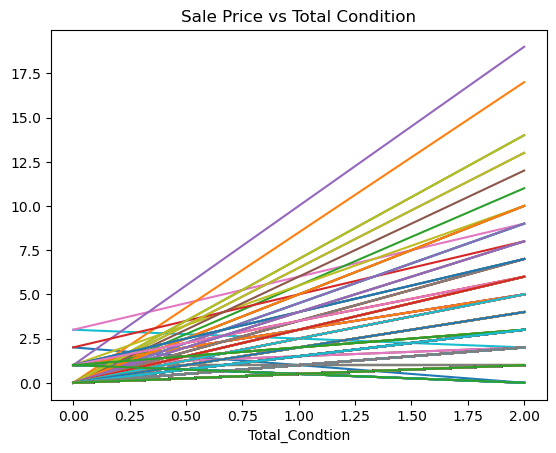

In [ ]:
pd.crosstab(houses['Total_Condtion'], houses['SalePrice']).plot(kind='line', title = 'Sale Price vs Total Condition', legend=False)


<Axes: title={'center': 'Sale Price vs Overall Rating'}, xlabel='Overall_Rating'>

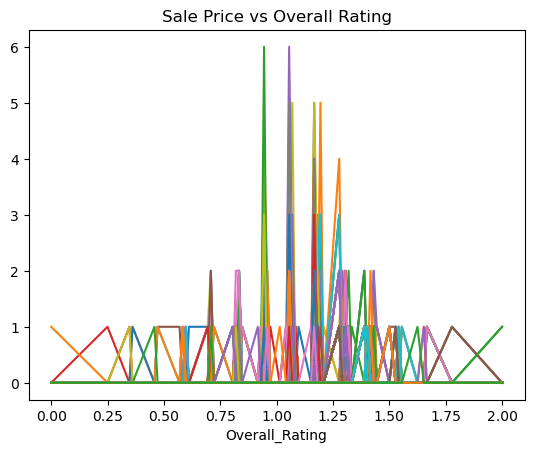

In [ ]:
pd.crosstab(houses['Overall_Rating'], houses['SalePrice']).plot(kind='line', title = 'Sale Price vs Overall Rating', legend=False)


<Axes: title={'center': 'Sale Price vs GrLivArea'}, xlabel='GrLivArea'>

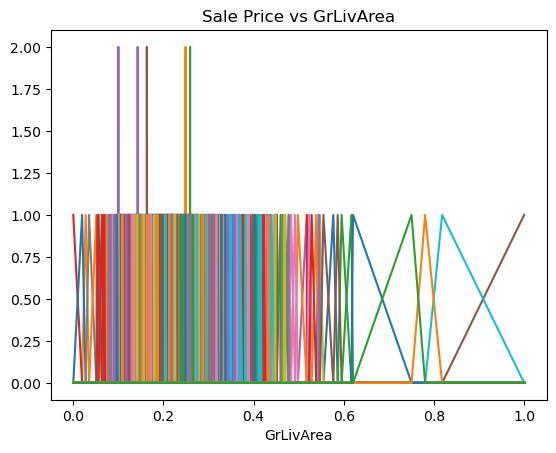

In [ ]:
pd.crosstab(houses['GrLivArea'], houses['SalePrice']).plot(kind='line', title = 'Sale Price vs GrLivArea', legend=False)
